In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import genfromtxt, array
import matplotlib.pyplot as plt
from numpy.linalg import eigh
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize			# version : 0.17
from sklearn.cluster import AgglomerativeClustering

In [3]:
γ = 0.1
X = array([[0.5,0.2],[0,0],[3,1],[4,1]])
n = X.shape[0]
K = rbf_kernel(X, gamma=γ)

In [4]:
[D,V] = eigh(K)

In [5]:
U = V[:, n-2:n]	# pick out the largest eigenvectors
Ū = normalize(U, norm='l2', axis=1) # normalize each row to length 1.

Run kmeans on the transformed data<br>
Here I used the sklearn version, but you should write your own

In [6]:
kmeans = KMeans(n_clusters=2).fit(Ū)
Xₒ = X[kmeans.labels_ == 0] 
Xₗ = X[kmeans.labels_ == 1]

/home/chieh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


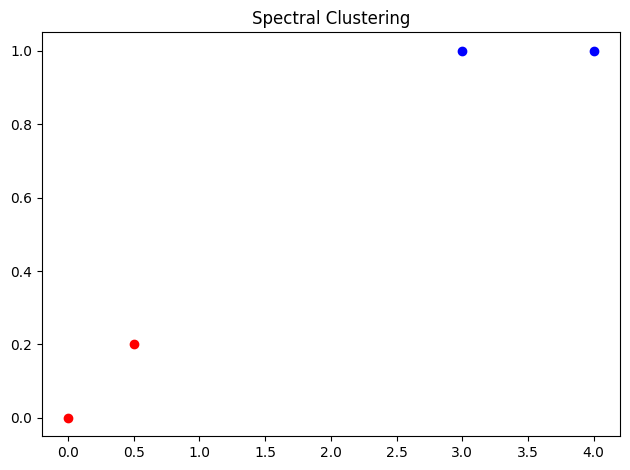

In [7]:
plt.scatter(Xₒ[:,0], Xₒ[:,1], color='red')
plt.scatter(Xₗ[:,0], Xₗ[:,1], color='blue')
plt.title('Spectral Clustering')
plt.tight_layout()
plt.show()